Terceira Parte do Projeto
<br>
IF816 - CIN-UFPE 2020.1
<br><br>
Alunos:
<br>
José Maycon Lima Cunegundes da Silva - jmlcs@cin.ufpe.br
<br>
Rafael Bernardo Nunes Neto - rbnn@cin.ufpe.br

## 1. Resumo

No final de 2019, o mundo foi surpreendido com o surgimento e a rápida disseminação de um novo vírus: o SARS-CoV-2, causador da Covid-19, uma doença com primeiro caso detectado na China, mas que se espalhou por todos os países do mundo. Desde então, toda a população mundial vem tentando buscar maneiras de parar - ou, pelo menos, desacelerar - a propagação desse vírus. Nesse contexto, a utilização de modelos matemáticos para prever o avanço da doença em diferentes cenários se mostra imprescindível, a fim de que sejam tomadas as medidas necessárias e mais efetivas no combate ao vírus. Assim, vamos propor uma variante do já conhecido modelo matemático SIR para prevenção de doenças, aplicado no estado de Pernambuco, para o Novo Coronavírus.

## 2. Introdução e Objetivos

O modelo matemático SIR surgiu no início do século XX com o objetivo de estudar e prever o comportamento de doenças numa sociedade usando equações diferenciais. A ideia principal é dividir a população da sociedade em 3 grupos: $S$, indicando a população suscetível a pegar a doença; $I$, indicando a população infecciosa; e $R$, que engloba os indivíduos que se recuperaram ou que morreram em decorrência da doença em questão.
<br><br>
Na situação atual da Covid-19, podemos tirar proveito desse modelo de modo que possamos prever o avanço da pandemia de acordo com algumas hipóteses iniciais. Nosso propósito será colher dados pertinentes sobre a pandemia no estado de Pernambuco para tentar predizer a disseminação do vírus de acordo com uma variante do modelo SIR citado.

## 3. Métodos

### Equações

A versão do modelo SIR empregada será a SEIR. A diferença da versão SEIR para a SIR é que o modelo SEIR adiciona um novo grupo: o grupo $E$ de indivíduos expostos. Esses indivíduos são caracterizados por terem contraído o vírus, mas ainda não terem demonstrado sintomas da doença. Dessa forma, adaptaremos as equações do modelo SIR inicial para adicionar o novo grupo de acordo com os dados apurados.
<br><br>
Como falamos anteriormente, o modelo SIR é baseado em 3 grupos. Supondo a população constante e chamando de $\beta$ a taxa de crescimento da doença e de $\gamma$ a taxa média de recuperação, isso nos leva às equações:
- $dS/dt =−\beta*S*I/N$
- $dI/dt = \beta*S*I/N - \gamma*I$ 
- $dR/dt = \gamma*I$

Observando as equações, vemos que a soma total dá zero, já que fizemos a suposição de que a população não varia. Além disso, analisando termo por termo, notamos que a taxa de variação de indivíduos suscetíveis depende do contato que o grupo $S$ tem com o grupo $I$. Essa observação será relevante a seguir.

Para o modelo SEIR, devemos adicionar uma nova equação para o novo grupo $E$. Agora, chamando de $\delta$ o tempo que um indivíduo infectado leva para se tornar infeccioso, temos:
- $dS/dt = -\beta*S*(I + q*E)/N$
- $dE/dt = \beta*S*(I + q*E)/N - E/\delta$
- $dI/dt = E/\delta - I*\gamma$
- $dR/dt = I*\gamma$

Aqui, observe o surgimento do grupo $E$ na equação do grupo $S$. Isso acontece porque um indivíduo exposto, apesar de não demonstrar sintomas, pode espalhar o vírus. A constante $q$ vem justamente para contabilizar a menor probabilidade que um indivíduo exposto tem de infectar outra pessoa, comparado à probabilidade de um indivíduo infeccioso de fazer o mesmo.

### Dados

Os dados serão coletados principalmento dos sites da Secretaria de Saúde de Pernambuco e do Ministério da Saúde do Governo Federal. O website da Secretaria da Saúde de PE disponibiliza informações sobre a Covid-19 de Secretarias de Saúde de todas as Unidades Federativas do Brasil, no entanto, estaremos interessados apenas nos relacionados a Pernambuco, portanto interpretaremos tais dados a fim de usá-los em nossos objetivos iniciais de prevenção e cuidados.
<br><br>
Seguem informações coletadas sobre o estado de Pernambuco:
- População inicial $N = 9,616,621$
- Taxa de infecção $\beta = 0.49$
- Taxa de "transferência" de exposto para infeccioso $1/\delta = 1/5.1$ 
- Taxa de recuperação $\gamma = 1/3.3$
- Taxa de letalidade $= 0.035$
- Tempo de incubação do vírus (em dias) $= 5.1$
- Número reprodutivo efetivo $R0 = 1.3$

## 4. Resultados e Discussão

Aplicando os dados obtidos nas equações descritas e utilizando códigos em Python, podemos obter previsões razoáveis da evolução da pandemia no estado de Pernambuco.
Utilizaremos, também, algumas bibliotecas de Python para visualização de gráficos e solução de EDOs, como MatPlotLib, SciPy e NumPy.

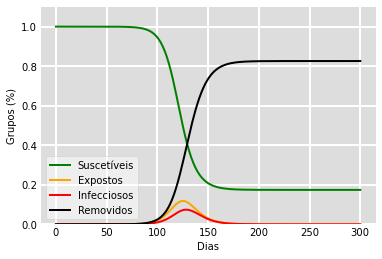

In [8]:
# Aqui, importamos as bibliotecas necessarias
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

# Introduzimos as informacoes citadas anteriormente
n_hab = 9616621
beta = 0.49
q = 0.2         # a probabilididade de um indiviuo exposto contaminar um individuo saudavel. Considerams um valor menor que beta pelos motivos citados anteriormente
delta = 5.1       # tempo de incubacao
gamma = 1/3.3
letality = 0.052
reproductive_ratio = 1.3

# Valores iniciais do modelo
i_inic = 1.0        # infecciosos
r_inic = 0.0        # removidos
e_inic = 0.0        # expostos
s_inic = n_hab - i_inic - r_inic - e_inic    # suscetiveis
x_inic = [s_inic,e_inic,i_inic,r_inic]  # um array que guarda as informacoes inicias

def projecao(x,t):
    s, e, i, r = x
    dx = np.zeros(4)    # inicializamos um array com 4 valores zero. Esses valores vao ser nossas taxas dS/dt, dE/dt, dI/dt e dR/dt
    dx[0] = -beta*s*(i+(q*e))/n_hab  # dS/dt
    dx[1] = (beta*s*(i+(q*e))/n_hab) - (e/delta)    # dE/dt
    dx[2] = (e/delta) - (i*gamma)     # dI/dt
    dx[3] = i*gamma  # dR/dt
    return dx

# Inicializando paramentros para exibicao do grafico
t = np.linspace(0,300,300)
x = odeint(projecao,x_inic,t)
s = x[:,0]
e = x[:,1]
i = x[:,2]
r = x[:,3]


# Funcoes para plotar o grafico
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, s/n_hab, 'green', lw=2, label='Suscetíveis')
ax.plot(t, e/n_hab, 'orange',  lw=2,label='Expostos')
ax.plot(t, i/n_hab, 'red', lw=2, label='Infecciosos')
ax.plot(t, r/n_hab, 'black', lw=2, label='Removidos')
ax.set_xlabel('Dias')
ax.set_ylabel('Grupos (%)')
ax.set_ylim(0,1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

Pelo gráfico projetado, observamos que nosso modelo prevê o "fim" da doença próximo a 170 dias, com mais de 80% da população contraindo o vírus em algum momento. Esse não é o cenário ideal, já que temos uma taxa de letalidade de aproximadamente 3,5%, o que levaria a óbito 2,8% da população do estado. 

## 5. Conclusão

É claro que nossa previsão não aconteceu de fato, dada a complexidade do mundo real várias ordens de grandeza maior do que a do nosso modelo. Isso reforça a importância de estudos mais aprofundados e do contato frequente dos órgãos de governo com a ciência, para que os piores cenários sejam evitados.
<br><br>
Ademais, para sofisticar este trabalho, alguns aprimoramentos podem ser aplicados. Algumas possibilidades são:
- considerar medidas de distanciamento;
- considerar quarentena de infectados;
- diferenciar, dentro do grupo dos removidos, óbitos e indivíduos recuperados;
- distinguir grupos sociais (pessoas que cumprem quarentena e pessoas que não cumprem, por exemplo)

Tais mudanças levariam a novos sistemas de equações e potencializariam os resultados obtidos com o objetivo de aproximar nossas conclusões, cada vez mais, da realidade.

## Referências

Rǎdulescu, A., Williams, C. & Cavanagh, K. Management strategies in a SEIR-type model of COVID 19 community spread. Sci Rep 10, 21256 (2020). https://doi.org/10.1038/s41598-020-77628-4
<br>
https://www.coronavirusnobrasil.org/
<br>
https://www.youtube.com/watch?v=Tb1ktCtTMB4

